In [5]:
import os
import sys
import numpy as np
import laspy as lp
from shapely.geometry import Polygon
import pandas as pd
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from fetch_data import FetchAndLoad
from file_helper import FileHelper

In [16]:
MINX, MINY, MAXX, MAXY = [-93.756155, 41.918015, -93.747334, 41.921429]
polygon = Polygon(((MINX, MINY), (MINX, MAXY), (MAXX, MAXY), (MAXX, MINY), (MINX, MINY)))
lp = FetchAndLoad(polygon)
lp.run_pipe()

Run pipe ...
data LInk :  https://s3-us-west-2.amazonaws.com/usgs-lidar-public/IA_FullState/ept.json
Fetching Completed!


In [17]:
lp.create_geopandasdf()
new_result =  lp.get_geopandas_df()

Reading Las File from : IA_FullState.las
Generating Points from las File ...
Finished Generating Points!
Making Geopandas Data Frame...
Finished Making Geopandas Data Frame!


In [22]:
new_result

,elevation,geometry
0,317.59,POINT (-93.75000 41.92000)
1,317.42,POINT (-93.75000 41.92000)
2,317.27,POINT (-93.75000 41.92000)
3,317.28,POINT (-93.75000 41.92000)
4,317.25,POINT (-93.75000 41.92000)
...,...,...
401488,317.36,POINT (-93.75000 41.92000)
401489,317.34,POINT (-93.75000 41.92000)
401490,317.46,POINT (-93.75000 41.92000)
401491,317.53,POINT (-93.75000 41.92000)


In [24]:
new_result.to_csv('IA_FullState.csv', index=False)

In [25]:

read_geo_csv = pd.read_csv('IA_FullState.csv')

In [26]:
read_geo_csv.head()

,elevation,geometry
0,317.59,POINT (-93.75 41.92)
1,317.42,POINT (-93.75 41.92)
2,317.27,POINT (-93.75 41.92)
3,317.28,POINT (-93.75 41.92)
4,317.25,POINT (-93.75 41.92)


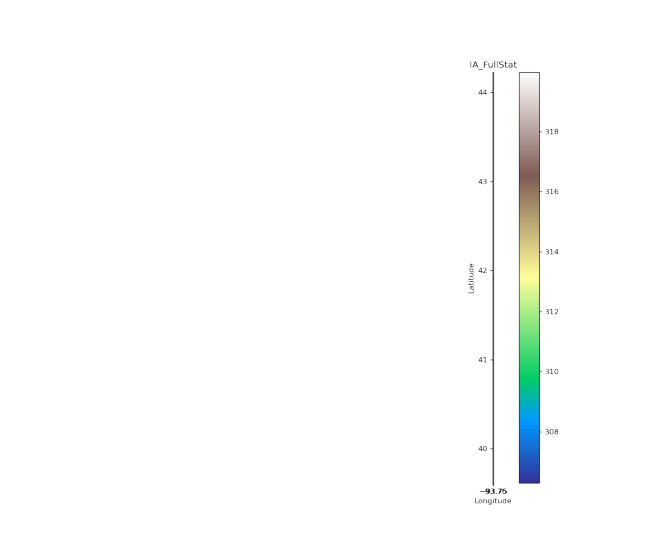

In [27]:

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

fig, ax = plt.subplots(1, 1, figsize=(12, 10))

new_result.plot(column='elevation', ax=ax, legend=True, cmap="terrain")
plt.title("IA_FullStat")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.savefig('../assets/img/heatmap.png', dpi=120)
plt.axis('off')
plt.close()
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
img = mpimg.imread('../assets/img/heatmap.png')
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()


In [25]:
point_cloud=lp.read_laz()

Reading Las File from : IA_FullState.las


In [26]:
points = np.vstack((point_cloud.x, point_cloud.y, point_cloud.z)).transpose(1,0)
colors = np.vstack((point_cloud.red, point_cloud.green, point_cloud.blue)).transpose()


In [27]:
points

array([[-93.77,  41.93, 321.77],
       [-93.77,  41.93, 321.81],
       [-93.77,  41.93, 321.88],
       ...,
       [-93.77,  41.93, 311.15],
       [-93.77,  41.94, 310.9 ],
       [-93.77,  41.93, 311.25]])

In [14]:
import laspy
# import open3d as o3d
import numpy as np
import laspy.header
header = laspy.header.Header()

In [15]:
input_las = laspy.file.File("./IA_FullState.las", mode="r")

In [16]:
factor=160
decimated_points_random = points[::factor]

In [18]:
# def visualize3D(self,data:gpd.GeoDataFrame)->None:
#         """Create a 3D pointcloud Visualization

#         Args:
#             data (GeoDataFrame): Dataframe to be visualized
#         """ 
        
#         # logger.info('Visualization 3D Started')
#         fig = plt.figure()
#         ax = fig.add_subplot(111,projection='3d')
#         ax.scatter( data.geometry.x,data.geometry.y,data.elevation, cmap='Spectral_r',s=0.001, c=data.elevation)
#         ax.set_xlabel('Longitude')
#         ax.set_ylabel('Latitude')
#         ax.set_zlabel('Elevation')
#         plt.show()
#         return fig

In [21]:
# import matplotlib.pyplot as plt
# decimated_colors = colors[::factor]
# # ax = plt.axes(projection='3d')
# # ax.scatter(decimated_points_random[:,0], decimated_points_random[:,1], decimated_points_random[:,2], c = decimated_colors/65535, s=0.01)
# # plt.show()
# fig = plt.figure()
# ax = fig.add_subplot(111,projection='3d')
# ax.scatter( read_geo_csv.geometry.x,new_result.geometry.y,new_result.elevation, cmap='Spectral_r',s=0.002, c=new_result.elevation)
# ax.set_xlabel('Longitude')
# ax.set_ylabel('Latitude')
# ax.set_zlabel('Elevation')
# plt.show()


In [22]:
import numpy as np
import laspy
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import get_test_data

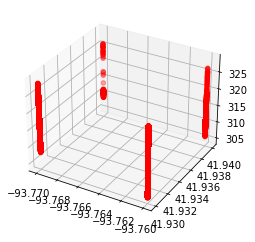

In [23]:
input_las = laspy.file.File("./IA_FullState.las", mode="r")
point_records = input_las.points.copy()

# getting scaling and offset parameters
las_scaleX = input_las.header.scale[0]
las_offsetX = input_las.header.offset[0]
las_scaleY = input_las.header.scale[1]
las_offsetY = input_las.header.offset[1]
las_scaleZ = input_las.header.scale[2]
las_offsetZ = input_las.header.offset[2]

# calculating coordinates
p_X = np.array((point_records['point']['X'] * las_scaleX) + las_offsetX)
p_Y = np.array((point_records['point']['Y'] * las_scaleY) + las_offsetY)
p_Z = np.array((point_records['point']['Z'] * las_scaleZ) + las_offsetZ)

# plotting points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(p_X, p_Y, p_Z, c='r', marker='o')

# X, Y, Z = get_test_data(0.05)
# ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)
plt.show()